# **Exploring Handwritten Digit Classification Using KNN**

### 3.1 First load the dataset and show the first 100 image

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

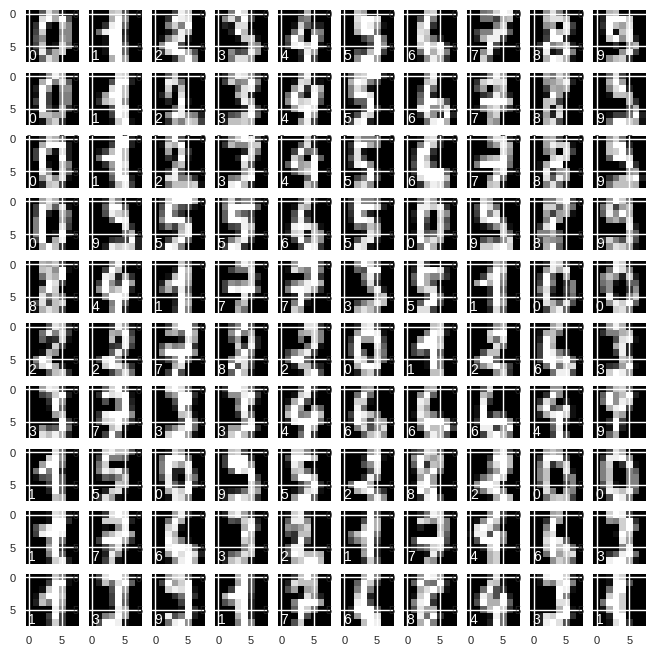

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='white')
    ax.tick_params(axis='both', labelsize=8)

plt.show()

### 3.2 Implement the train-test splitting with a test size of 0.25 (set the random_state=42), properly perform standardization and transformation of datasets, train a 3NN on training set, and report the accuracy on test set (no need for exploratory analysis).

In [ ]:
digits.target[:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

In [ ]:
import numpy as np
np.bincount(digits.target)

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(digits.data, digits.target, random_state=42, test_size=0.25, stratify=digits.target)
print('X_train_shape: ' + str(X_train.shape) + '\nX_test_shape: ' + str(X_test.shape)\
       + '\ny_train_shape: ' + str(y_train.shape) + '\ny_test_shape: ' + str(y_test.shape))

X_train_shape: (1347, 64)
X_test_shape: (450, 64)
y_train_shape: (1347,)
y_test_shape: (450,)


In [ ]:
np.bincount(y_train)

array([133, 136, 133, 137, 136, 136, 136, 134, 131, 135])

In [ ]:
np.bincount(y_test)

array([45, 46, 44, 46, 45, 46, 45, 45, 43, 45])

In [ ]:
import pandas as pd
X_train_df = pd.DataFrame(X_train, columns=digits.feature_names)
y_train_df = pd.DataFrame(y_train, columns=['class'])
X_y_train_df = pd.concat([X_train_df, y_train_df], axis=1)
X_y_train_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,class
0,0.0,2.0,12.0,16.0,12.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,15.0,16.0,16.0,15.0,3.0,0.0,2
1,0.0,0.0,0.0,13.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,11.0,9.0,0.0,0.0,0.0,1
2,0.0,2.0,11.0,16.0,12.0,1.0,0.0,0.0,0.0,9.0,...,0.0,0.0,2.0,15.0,16.0,16.0,13.0,16.0,1.0,2
3,0.0,0.0,11.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,12.0,16.0,16.0,16.0,16.0,12.0,1
4,0.0,0.0,3.0,12.0,16.0,10.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,5.0,13.0,0.0,0.0,0.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,0.0,0.0,0.0,5.0,15.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,14.0,12.0,1.0,0.0,1
1343,0.0,0.0,2.0,12.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,13.0,15.0,9.0,0.0,0.0,0
1344,0.0,0.0,1.0,7.0,13.0,10.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,7.0,15.0,16.0,10.0,0.0,9
1345,0.0,0.0,3.0,14.0,13.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,13.0,15.0,7.0,0.0,0.0,8


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# print("X_train mean:", X_train_scaled.mean(axis=0))
# print("X_train std:", X_train_scaled.std(axis=0), "\n\n")

# print("X_test mean:", X_test_scaled.mean(axis=0))
# print("X_test std:", X_test_scaled.std(axis=0))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

knn = KNN(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# print('The test accuracy is {:.2f}'.format(knn.score(X_test_scaled, y_test)))

y_test_predictions = knn.predict(X_test_scaled)
print('knn predicts: ' + str(digits.target_names[y_test_predictions]))

knn predicts: [1 0 9 1 5 6 7 9 1 5 5 9 2 2 7 6 5 4 8 6 9 4 0 6 0 1 2 0 7 7 3 3 8 7 4 6 5
 1 5 5 4 0 8 8 5 8 4 3 0 7 2 5 1 2 1 1 4 4 9 5 2 5 0 9 0 2 4 1 7 9 6 1 8 5
 4 3 4 4 3 6 1 0 1 2 3 7 7 2 9 6 9 8 2 6 7 5 9 7 0 5 0 1 1 9 2 4 6 5 1 0 0
 9 8 8 4 2 8 4 1 4 0 0 7 5 7 1 3 9 2 7 2 6 9 7 0 0 1 6 3 5 1 6 0 9 6 7 4 1
 6 6 7 5 8 8 3 4 4 9 0 2 9 0 9 6 0 7 6 4 4 6 7 7 4 6 9 7 4 3 5 2 0 8 4 5 8
 3 5 7 8 3 9 8 6 2 8 4 2 1 9 9 6 9 2 5 1 0 9 3 0 4 4 5 5 3 3 6 3 1 0 6 7 1
 6 9 6 3 2 3 0 7 8 1 5 5 9 3 4 2 8 3 4 3 9 5 2 2 3 5 6 0 4 2 2 8 8 1 3 0 9
 6 8 0 3 3 1 1 7 8 8 9 1 7 6 2 1 0 2 3 9 7 7 7 9 2 5 9 5 7 3 5 9 7 1 8 0 4
 2 3 1 7 2 8 3 6 3 1 4 1 4 0 1 6 3 2 7 6 3 1 1 0 1 8 3 3 4 6 4 0 2 2 2 2 2
 9 6 6 6 4 9 1 1 4 8 6 7 5 8 1 8 6 7 3 2 0 2 3 8 5 0 9 4 2 1 4 5 7 9 4 2 6
 5 9 3 5 8 4 2 1 5 9 1 9 3 7 3 7 7 3 3 4 3 7 2 7 3 0 5 2 9 6 5 5 2 1 7 0 2
 3 0 0 1 2 7 8 3 5 9 8 0 9 4 1 6 6 9 0 0 6 0 7 5 5 8 6 8 2 7 7 6 5 7 6 1 7
 8 8 0 3 4 8]


In [ ]:
errors = (y_test_predictions != y_test)
sum(errors)

15

In [ ]:
from sklearn.metrics import accuracy_score

error_est = sum(errors)/errors.size

print('The test accuracy is {:.2f}'.format(accuracy_score(y_test, y_test_predictions)), "\nThe error rate is {:.2f}".format(error_est))

The test accuracy is 0.97 
The error rate is 0.03


**The test accuracy is 0.97**

**The error rate is 0.03**

Checking misclassified images

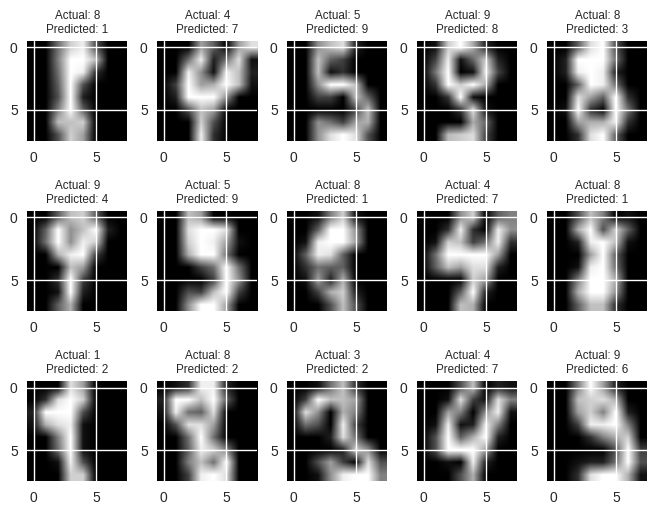

In [ ]:
misclassified_actual_labels = y_test[errors]
misclassified_predicted_labels = y_test_predictions[errors]
images = X_test[errors]

fig, axes = plt.subplots(3, 5, figsize=(8, 6), gridspec_kw={'hspace': 0.4, 'wspace': 0.3})

for ax, (image, actual, predicted) in zip(axes.flat, zip(images, misclassified_actual_labels, misclassified_predicted_labels)):
    ax.imshow(image.reshape(8, 8), cmap='gray', interpolation='bilinear')
    ax.set_title(f"Actual: {actual}\nPredicted: {predicted}", fontsize='small')

plt.show()

# **4.Homework**

### 4.1.1 Instead of 4 features used in Section 4.2.2, use all features to train and test. Record the accuracy of 3NN with default parameters as in Section 4.2.2. Does this change lead to a better or worse performance compared with what you observed in Section 4.2.2?

In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

boston_pd = pd.DataFrame(data, columns=feature_names)
boston_pd['MEDV'] = target
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(boston_pd.iloc[:,:13], boston_pd.iloc[:,13], random_state=100)
print('X_train_shape: ' + str(X_train.shape) + '\nX_test_shape: ' + str(X_test.shape)\
       + '\ny_train_shape: ' + str(y_train.shape) + '\ny_test_shape: ' + str(y_test.shape))

X_train_shape: (379, 13)
X_test_shape: (127, 13)
y_train_shape: (379,)
y_test_shape: (127,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train_fs_scaled = scaler.transform(X_train)
X_test_fs_scaled = scaler.transform(X_test)

<ipython-input-13-2af56f1858bf>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


The test R^2 is: 0.77


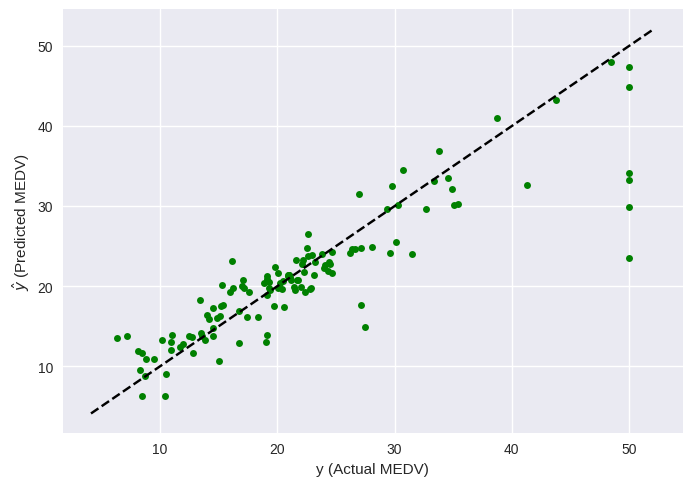

In [ ]:
from sklearn.neighbors import KNeighborsRegressor as KNN
import matplotlib.pyplot as plt

plt.style.use('seaborn')
knn = KNN(n_neighbors=3)
knn.fit(X_train_fs_scaled, y_train)
y_test_predictions = knn.predict(X_test_fs_scaled)
plt.plot(y_test, y_test_predictions, 'g.', markersize=10)
lim_left, lim_right = plt.xlim()
plt.plot([lim_left, lim_right], [lim_left, lim_right], '--k')
plt.xlabel("y (Actual MEDV)")
plt.ylabel("$\hat{y}$ (Predicted MEDV)")
print('The test R^2 is: {:.2f}'.format(knn.score(X_test_fs_scaled, y_test)))

The change lead to better performance comparing with taking only 4 features on the first sight. In the scatter plot, we can see that around $25K, for example, our predictions became closer to the actual amounts. But it resulted in a decrease in the R^2 value from 0.79 to 0.77. Perhaps, the additional features introduced noise or irrelevant information into the model, which could negatively impact its performance.

### 4.1.2 In this part use all features as Part 1; however, use a DW-3NN with Manhattan distance. Do you see better or worse improvemnt compared with Part 1 and what you saw previously in Section 4.2.2?

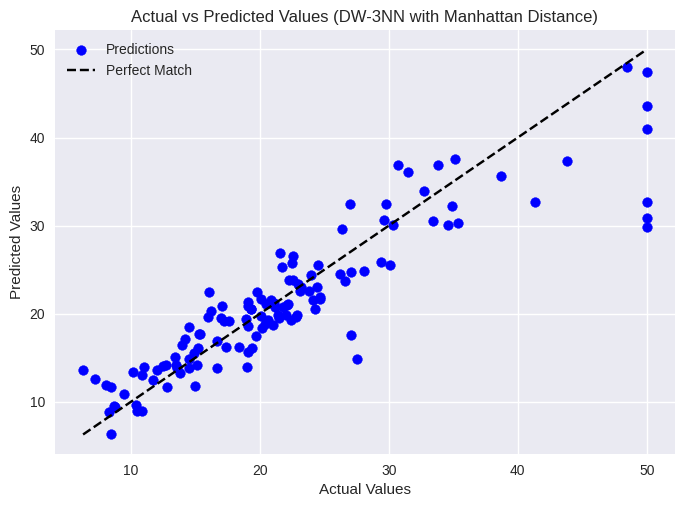

The test R^2 is: 0.81


In [ ]:
knn_manhattan = KNN(n_neighbors=3, p=1)
knn_manhattan.fit(X_train_fs_scaled, y_train)

y_test_predictions_manhattan = knn_manhattan.predict(X_test_fs_scaled)
plt.scatter(y_test, y_test_predictions_manhattan, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label='Perfect Match')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (DW-3NN with Manhattan Distance)")
plt.legend()
plt.show()

print('The test R^2 is: {:.2f}'.format(knn_manhattan.score(X_test_fs_scaled, y_test)))

Compared to the R^2 values which were earlier (0.79 and 0.77), this model seems to be a better improvement. This improvement may be due to the selection of the Manhattan distance. It means that, compared to Euclidean distance, Manhattan distance may be a better appropriate metric for determining how similar two data points are for this particular dataset.

### 4.2 Which class is assigned to an observation  x0=0.4  if we use 5-NN with the following training data?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X_train = [[0.95], [-0.15], [-0.1], [0], [0.1], [1]]
y_train = [0, 1, 1, 0, 1, 0]

knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)

x0 = [[0.4]]
predicted_class = knn_5.predict(x0)

print(f"The predicted class for x0=0.4 using 5-NN is: {predicted_class[0]}")

The predicted class for x0=0.4 using 5-NN is: 1


### 4.3 Suppose $y_i$ denotes the target value (outcome) associated with feature vector $\mathbf{x}_i$ in the training data. A trained 5NN happened to estimate the target value for each $\mathbf{x}_i$ as $3y_i-2\bar{y}$ where $\bar{y}$ is the average of target values in the training set. What is the $R^2$ of this 5NN on training data?

Calculations:
\begin{align}
\hat{y}_i = 3y_i - 2\bar{y}
\quad\quad\quad\quad(1)\\
\text{RSS}= \sum_{i = 1}^m (y_i-3y_i + 2\bar{y})^2 \quad\quad\quad\quad(2)\\
\text{RSS}= 4\sum_{i = 1}^m (y_i-\bar{y})^2 \quad\quad\quad\quad(3)\\
\text{TSS}= \sum_{i = 1}^m (y_i-\bar{y})^2 \quad\quad\quad\quad(4)\\
R^2 = 1- \frac{\text{RSS}}{\text{TSS}}=1 - 4 = -3 \quad\quad\quad\quad(5)
\end{align}


In [ ]:
yi = np.array([1, 2, 3, 4, 5])
y_bar = np.mean(yi)
y_hat = 3 * yi - 2 * y_bar

rss = np.sum((yi - y_hat)**2)
tss = np.sum((yi - y_bar)**2)

r2 = 1 - rss / tss

print(f"The R^2 score on the training data is: {r2:.4f}")

The R^2 score on the training data is: -3.0000


R^2 is negative. It means that the model's predictions are worse than a constant function that always predicts the mean of the data.